# INTRODUCTION TO DATA SCIENCE - PROJECT 3#
## Rishiraj Rana##
## Monthly Data Forecasting##

Data Preprocessing

In [1]:
!pip install prophet

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import plotly.express as px
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
import os
from tqdm.keras import TqdmCallback
from sklearn.model_selection import train_test_split
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
from prophet import Prophet
monthly_data = pd.read_csv('/content/SN_m_tot_V2.0.csv')
monthly_data.info()
monthly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   1749;01;1749.042;  96.7; -1.0;   -1;1  3279 non-null   object
dtypes: object(1)
memory usage: 25.7+ KB


,1749;01;1749.042; 96.7; -1.0; -1;1
0,1749;02;1749.123; 104.3; -1.0; -1;1
1,1749;03;1749.204; 116.7; -1.0; -1;1
2,1749;04;1749.288; 92.8; -1.0; -1;1
3,1749;05;1749.371; 141.7; -1.0; -1;1
4,1749;06;1749.455; 139.2; -1.0; -1;1


In [4]:
monthly_data = pd.read_csv('/content/SN_m_tot_V2.0.csv', sep=';', header=None, names=['Year', 'Month', 'Fraction', 'Sunspots', 'Sunspots_sd', 'Observations', 'Definitive'])

monthly_data["Date"] = pd.to_datetime(monthly_data[["Year", "Month"]].assign(Day=1))

monthly_data.head()

,Year,Month,Fraction,Sunspots,Sunspots_sd,Observations,Definitive,Date
0,1749,1,1749.042,96.7,-1.0,-1,1,1749-01-01
1,1749,2,1749.123,104.3,-1.0,-1,1,1749-02-01
2,1749,3,1749.204,116.7,-1.0,-1,1,1749-03-01
3,1749,4,1749.288,92.8,-1.0,-1,1,1749-04-01
4,1749,5,1749.371,141.7,-1.0,-1,1,1749-05-01


In [5]:
monthly_data = monthly_data[['Date', 'Sunspots']]

monthly_data.head()

,Date,Sunspots
0,1749-01-01,96.7
1,1749-02-01,104.3
2,1749-03-01,116.7
3,1749-04-01,92.8
4,1749-05-01,141.7


Plotting the data

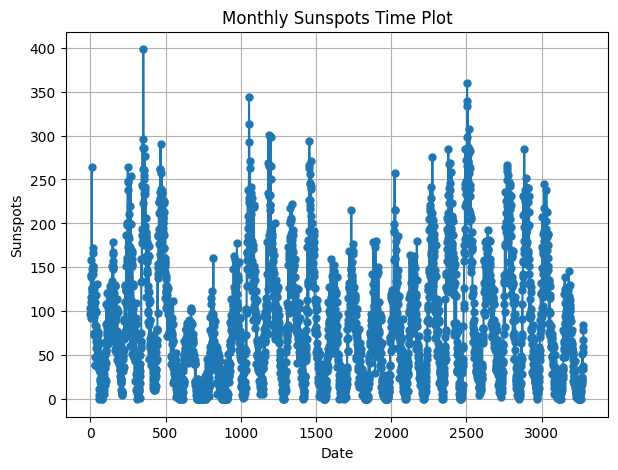

In [7]:
plt.figure(figsize=(7, 5))

plt.plot(monthly_data.index, monthly_data['Sunspots'], marker='o', linestyle='-', markersize=5)
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.title('Monthly Sunspots Time Plot')
plt.grid(True)
plt.show()

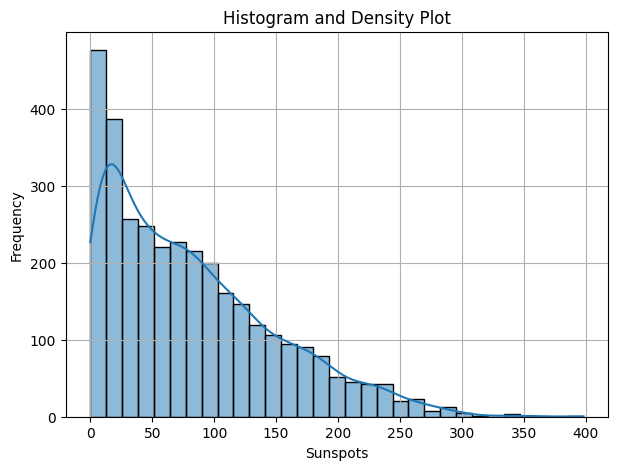

In [8]:
# Histogram and Density Plot
plt.figure(figsize=(7, 5))
sns.histplot(monthly_data['Sunspots'], kde=True)
plt.xlabel('Sunspots')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plot')
plt.grid(True)
plt.show()

In [9]:
monthly_data = pd.read_csv('/content/SN_m_tot_V2.0.csv', sep=';', header=None, names=['Year', 'Month', 'Fraction', 'Sunspots', 'Sunspots_sd', 'Observations', 'Definitive'])
monthly_data["Date"] = pd.to_datetime(monthly_data[["Year", "Month"]].assign(Day=1))

monthly_data = monthly_data[["Date", "Sunspots"]].replace(-1, None).dropna()
monthly_data.rename(columns={"Date": "ds", "Sunspots": "y"}, inplace=True)

In [10]:
monthly_data.head()
monthly_data.tail()

,ds,y
3275,2021-12-01,67.5
3276,2022-01-01,54.0
3277,2022-02-01,59.7
3278,2022-03-01,78.5
3279,2022-04-01,84.1


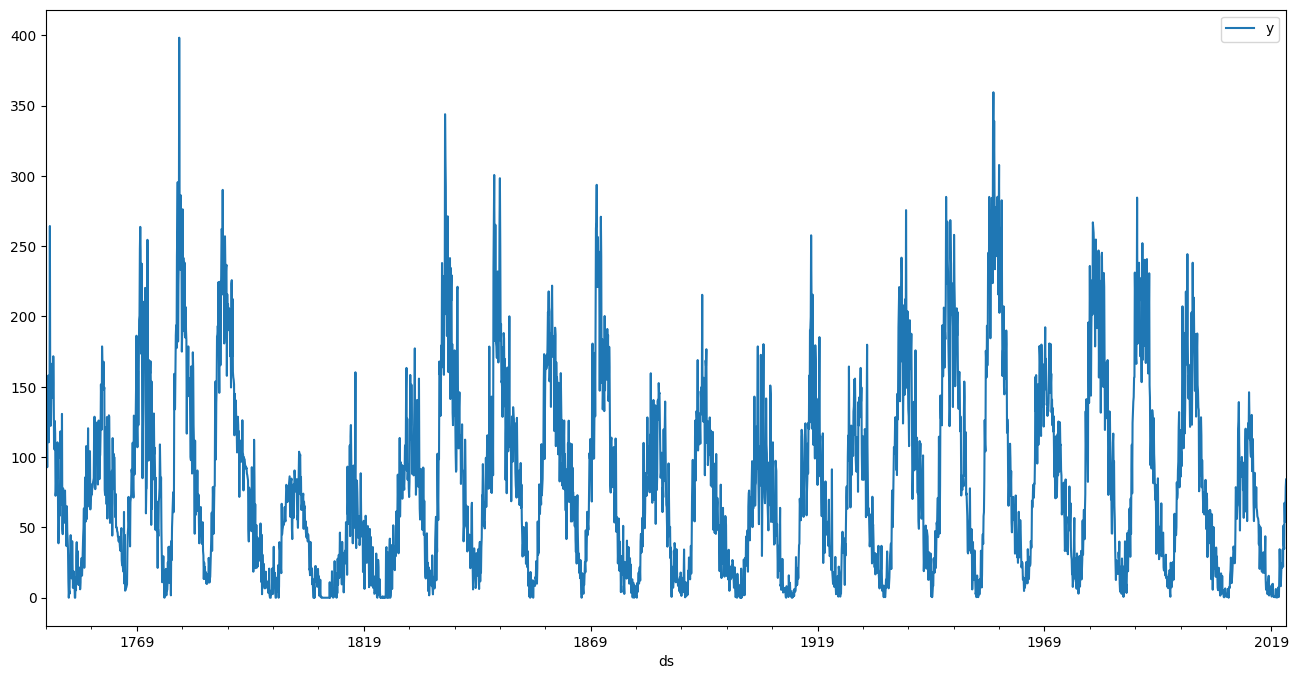

In [11]:
monthly_data.plot(x='ds', y='y', figsize=(16,8))
plt.show()

Training FBProphet model

In [ ]:
monthly_data["cap"] = 450
monthly_data["floor"] = 0

In [12]:
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

In [13]:
train = monthly_data.iloc[:len(monthly_data)-12]
test = monthly_data.iloc[len(monthly_data)-12:]

In [14]:
model = Prophet(growth='linear', daily_seasonality=True)
model.add_seasonality(name='custom_monthly', period=365.25, fourier_order=10)
model.fit(monthly_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyf8tgjxr/82ydb8q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyf8tgjxr/pvdglr54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54864', 'data', 'file=/tmp/tmpyf8tgjxr/82ydb8q8.json', 'init=/tmp/tmpyf8tgjxr/pvdglr54.json', 'output', 'file=/tmp/tmpyf8tgjxr/prophet_modelqpx1emao/prophet_model-20241129200747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Making Predictions

In [15]:
future = model.make_future_dataframe(periods=9, freq='M')
future["cap"] = 450
future["floor"] = 0
forecast = model.predict(future)

In [16]:
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3284,2022-08-31,58.994409,450,-24.347944,143.490317,58.994409,58.994409,0.926267,0.926267,0.926267,...,-1.078926,-1.078926,-1.078926,1.002597,1.002597,1.002597,0.0,0.0,0.0,59.920676
3285,2022-09-30,58.921339,450,-21.217023,140.973724,58.921339,58.921339,0.882282,0.882282,0.882282,...,-1.078926,-1.078926,-1.078926,0.980604,0.980604,0.980604,0.0,0.0,0.0,59.803620
3286,2022-10-31,58.845833,450,-33.979578,133.835155,58.845833,58.845833,-7.508019,-7.508019,-7.508019,...,-1.078926,-1.078926,-1.078926,-3.214546,-3.214546,-3.214546,0.0,0.0,0.0,51.337814
3287,2022-11-30,58.772763,450,-25.964593,146.862985,58.772763,58.772763,-1.583647,-1.583647,-1.583647,...,-1.078926,-1.078926,-1.078926,-0.252361,-0.252361,-0.252361,0.0,0.0,0.0,57.189116
3288,2022-12-31,58.697258,450,-27.921534,134.005053,58.697258,58.697258,-3.253655,-3.253655,-3.253655,...,-1.078926,-1.078926,-1.078926,-1.087365,-1.087365,-1.087365,0.0,0.0,0.0,55.443602


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3284,2022-08-31,59.920676,-24.347944,143.490317
3285,2022-09-30,59.803620,-21.217023,140.973724
3286,2022-10-31,51.337814,-33.979578,133.835155
3287,2022-11-30,57.189116,-25.964593,146.862985
3288,2022-12-31,55.443602,-27.921534,134.005053


In [18]:
test.tail()

,ds,y
3275,2021-12-01,67.5
3276,2022-01-01,54.0
3277,2022-02-01,59.7
3278,2022-03-01,78.5
3279,2022-04-01,84.1


Plotting the forecast

In [19]:
plot_plotly(model, forecast)

In [21]:
future_3 = model.make_future_dataframe(periods=3, freq='M')
future_6 = model.make_future_dataframe(periods=6, freq='M')
future_12 = model.make_future_dataframe(periods=12, freq='M')

future_3["cap"] = 450
future_3["floor"] = 0
forecast_3 = model.predict(future_3)

future_6["cap"] = 450
future_6["floor"] = 0
forecast_6 = model.predict(future_6)

future_12["cap"] = 450
future_12["floor"] = 0
forecast_12 = model.predict(future_12)

In [24]:
print("\n3-month forecast:")
print(forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3))
plot_plotly(model, forecast_3)


3-month forecast:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  54.337756  -26.677735  138.571379
3281 2022-05-31  58.411570  -20.501286  139.952933
3282 2022-06-30  59.908665  -20.107013  140.285450


In [25]:
print("\n6-month forecast:")
print(forecast_6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))
plot_plotly(model, forecast_6)


6-month forecast:
             ds       yhat  yhat_lower  yhat_upper
3280 2022-04-30  54.337756  -25.369746  141.491087
3281 2022-05-31  58.411570  -24.328599  138.587202
3282 2022-06-30  59.908665  -29.155144  141.150761
3283 2022-07-31  62.844061  -21.374592  143.222128
3284 2022-08-31  59.920676  -21.006707  145.767255
3285 2022-09-30  59.803620  -18.701995  144.657922


In [26]:
print("\n12-month forecast:")
print(forecast_12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3))
plot_plotly(model, forecast_12)


12-month forecast:
             ds       yhat  yhat_lower  yhat_upper
3289 2023-01-31  59.559115  -21.050111  144.263370
3290 2023-02-28  58.554816  -23.703257  142.600084
3291 2023-03-31  55.013916  -31.009697  139.857459


In [20]:
plot_components_plotly(model, forecast)

Evolution

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
forecast_aligned = forecast[forecast['ds'].isin(test['ds'])]

min_len = min(len(test['y']), len(forecast_aligned['yhat']))
rmse_value = rmse(test['y'][:min_len], forecast_aligned['yhat'][:min_len])

print(rmse_value)

24.270104172443038


In [29]:
forecast_aligned = forecast[forecast['ds'].isin(test['ds'])]

min_len = min(len(test['y']), len(forecast_aligned['yhat']))

predictions = forecast_aligned['yhat'][:min_len]

rmse_value = rmse(predictions, test['y'][:min_len])

print("Root mean squared error between actual and predicted values:", rmse_value)

print("mean value of the dataset: ",  test['y'].mean())

Root mean squared error between actual and predicted values: 24.270104172443038
mean value of the dataset:  47.48333333333333


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
y_true = monthly_data["y"][-365:]
y_pred = forecast["yhat"][-365:]
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r2)

Mean Absolute Error: 45.74823880211066
Mean Absolute Percentage Error: 835407735629383.0
R-squared: 0.05963199113318851
